#**Actividad 2. Predicción de precios en el mercado inmobiliario**

###**Maestría en Inteligencia Artificial Aplicada**
###**Curso: Inteligencia Artificial y Aprendizaje Automático**
####**Tecnológico de Monterrey**
#####**Prof Luis Eduardo Falcón Morales**

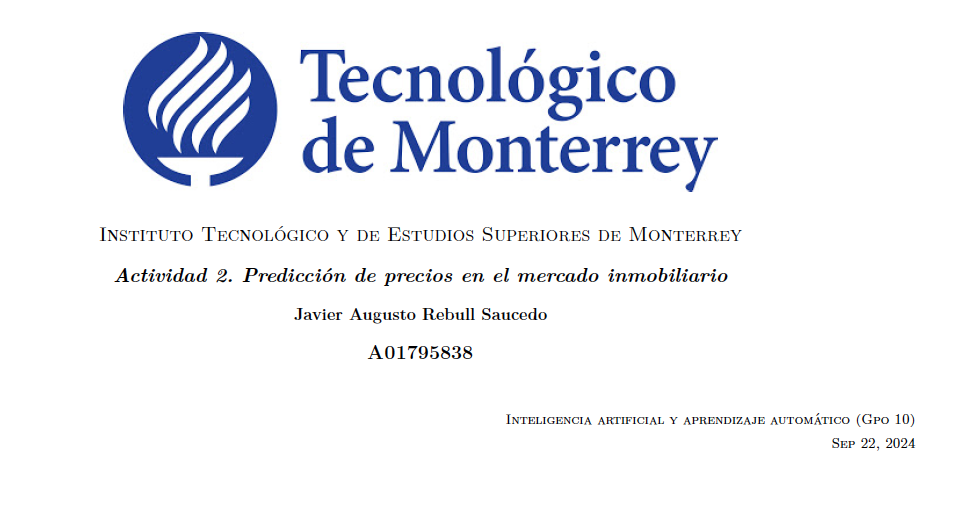

**NOTAS:**

*   Esta actividad la puedes realizar en Google-Colab.
*   Se trabajará solamente con el archivo "california_housing_train.csv".
*   Si no trabajas con Google-Colab, deberás descargar el archivo y trabajarlo en el editor de tu preferencia.
*   Esta actividad consta solamente de 3 ejercicios, dividios en 3 partes.
*   **Solamente debes modificar este archivo agregando tus líneas de código en las partes que se te indican.**
*   **Cualquier modificación fuera de estas áreas te restará puntos a la actividad.**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

from sklearn.pipeline import Pipeline
from sklearn.model_selection import KFold
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import power_transform
from sklearn.preprocessing import FunctionTransformer

from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression

In [2]:
# Cargamos el archivo que está en la siguiente carpeta de Google-Colab:
DIR = "/content/sample_data/"
os.chdir(DIR)

misdatos = pd.read_csv("california_housing_train.csv", sep=",")
misdatos.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000
mean,-119.562108,35.625225,28.589353,2643.664412,539.410824,1429.573941,501.221941,3.883578,207300.912353
std,2.005166,2.137340,12.586937,2179.947071,421.499452,1147.852959,384.520841,1.908157,115983.764387
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.790000,33.930000,18.000000,1462.000000,297.000000,790.000000,282.000000,2.566375,119400.000000
50%,-118.490000,34.250000,29.000000,2127.000000,434.000000,1167.000000,409.000000,3.544600,180400.000000
75%,-118.000000,37.720000,37.000000,3151.250000,648.250000,1721.000000,605.250000,4.767000,265000.000000
max,-114.310000,41.950000,52.000000,37937.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


#**Ejercicio - 1: Matriz de Correlación de Pearson**

**PREGUNTAS:**

*   **Pregunta 1.1.** Investiga cuál es la importancia del coeficiente de correlación de Pearson y cómo puede utilizarse durante el análisis de los datos de un problema.

*   **Pregunta 1.2.** El coeficiente de correlación de Pearson, ¿para qué tipo de variables lo podemos aplicar?  

*   **Pregunta 1.3.** Despliega la matriz de correlación de las variables del dataframe "misdatos", incluyendo en cada celda de la matriz el valor numérico de la correlación entre cada par de variables. Al desplegar la matriz de correlación deberás además usar la opción del mapa de calor (heatmap) de la librería seaborn, usando el mapa de color 'BuGn'.

Puedes consultar la siguiente documentación:

https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.corr.html

https://seaborn.pydata.org/generated/seaborn.heatmap.html

https://matplotlib.org/stable/tutorials/colors/colormaps.html


### **Respuestas:**

++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++

++++++++ Inicia sección para agregar texto ++++++++++++++++++++++++++


## *   **Respuesta 1.1.**

El coeficiente de correlación de Pearson es una medida estadística que cuantifica la fuerza y dirección de la relación lineal entre dos variables cuantitativas continuas. Se representa comúnmente con la letra “r” y su valor oscila entre -1 y 1.

Importancia del coeficiente de correlación de Pearson:

	1.	Medición de la relación lineal: Permite determinar si existe una relación lineal significativa entre dos variables. Esto es fundamental para comprender cómo una variable puede influir en otra.
	2.	Dirección de la relación: Indica si la relación entre las variables es positiva (cuando una variable aumenta, la otra también) o negativa (cuando una variable aumenta, la otra disminuye).
	3.	Intensidad de la relación: Cuanto más cercano esté el valor de “r” a 1 o -1, más fuerte es la relación lineal. Un valor cercano a 0 indica una relación débil o inexistente.
<br>
Uso durante el análisis de datos:

	•	Análisis exploratorio: Ayuda a identificar relaciones potenciales entre variables antes de aplicar modelos más complejos.
	•	Selección de variables: En modelos de regresión y análisis predictivo, se utiliza para seleccionar variables que tienen una relación significativa con la variable dependiente.
	•	Validación de hipótesis: Permite probar hipótesis sobre la relación entre variables, proporcionando evidencia estadística sobre la existencia y naturaleza de dicha relación.
	•	Detección de multicolinealidad: En análisis multivariado, ayuda a identificar variables altamente correlacionadas que podrían distorsionar los resultados de los modelos estadísticos.

<br><br>

## *   **Respuesta 1.2.**

El coeficiente de correlación de Pearson se aplica específicamente a variables que cumplen las siguientes características:

	1.	Variables cuantitativas continuas: Ambas variables deben ser numéricas y capaces de asumir un rango amplio de valores. Ejemplos incluyen altura, peso, temperatura, tiempo, etc.
	2.	Medidas en escala de intervalo o de razón:
	•	Escala de intervalo: Las diferencias entre valores son significativas, pero no hay un cero absoluto. Un ejemplo es la temperatura en grados Celsius.
	•	Escala de razón: Además de tener diferencias significativas entre valores, existe un cero absoluto que indica ausencia de la variable medida. Ejemplos incluyen peso, altura y volumen.
	3.	Relación lineal: El coeficiente de Pearson mide la fuerza y dirección de una relación lineal entre las dos variables. Por lo tanto, es apropiado cuando se espera o se ha observado que la relación entre las variables es lineal.
	4.	Distribución aproximadamente normal: Aunque no es un requisito absoluto, es recomendable que las variables sigan una distribución normal para que las inferencias estadísticas sean más fiables.
	5.	Homocedasticidad: La varianza de las variables debe ser constante a lo largo de los valores de la variable independiente. Esto significa que la dispersión de los datos es similar a lo largo de la línea de regresión.

<br>
No es adecuado aplicar el coeficiente de correlación de Pearson en los siguientes casos:

	•	Variables categóricas o cualitativas: Para variables nominales u ordinales (como género, color, nivel de satisfacción), el coeficiente de Pearson no es apropiado. En su lugar, se podrían utilizar otras medidas como el coeficiente de correlación de Spearman o pruebas chi-cuadrado.
	•	Relaciones no lineales: Si la relación entre las variables es curvilínea o no lineal, el coeficiente de Pearson puede subestimar o no detectar la correlación.

<br>
Resumen:

El coeficiente de correlación de Pearson es aplicable a variables cuantitativas continuas medidas en escalas de intervalo o razón, donde se presupone una relación lineal y, preferiblemente, una distribución normal de los datos. Es una herramienta fundamental en estadística para explorar y cuantificar relaciones lineales entre variables numéricas.


<br>
<strong><span style="color: blue;">Bibliografía:</span></strong>

Universidad de Sevilla, Vara Rey, J. (s.f.). *Correlación*. Recuperado el 22 de septiembre de 2024, de [https://personal.us.es/vararey/adatos2/correlacion.pdf](https://personal.us.es/vararey/adatos2/correlacion.pdf)


++++++++ Termina sección para agregar texto ++++++++++++++++++++++++

+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++

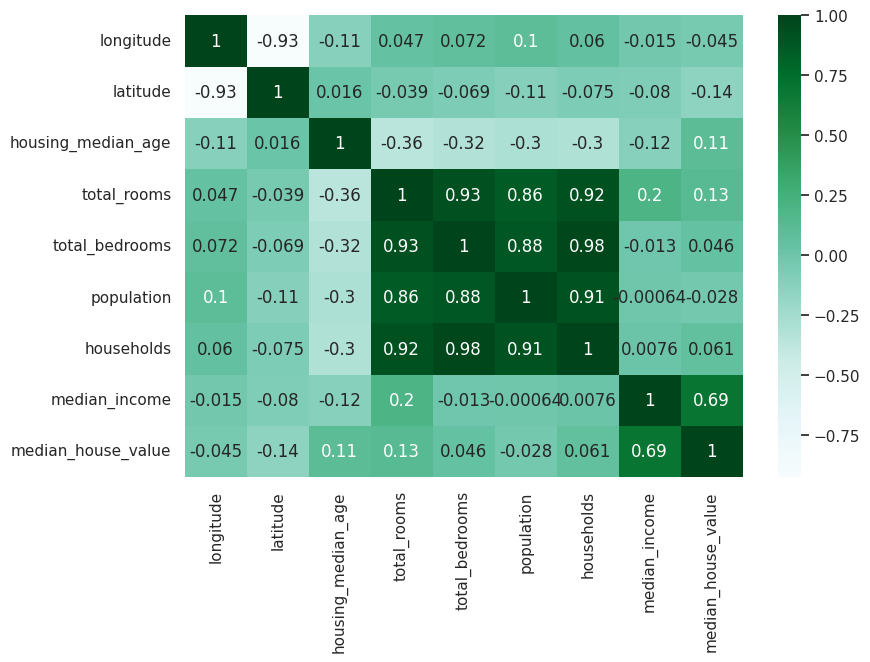

In [3]:
sns.set(rc={'figure.figsize':(9,6)})

#########################################################################
# INICIA LA SECCIÓN PARA AGREGAR CÓDIGO.
# Respuesta 1.3.

# Sustituye "None" por tus líneas de código dentro de esta región.
# Se esperan cuando mucho 2 líneas de código.

dfMatrizCorrelacion = misdatos.corr() # Calculamos la matriz de correlación
sns.heatmap(dfMatrizCorrelacion, annot=True, cmap='BuGn') # Visualizamos la matriz de correlación con un mapa de calor

# TERMINA LA SECCIÓN PARA AGREGAR CÓDIGO.
#########################################################################

plt.show()

#**Ejercicio - 2: Transformaciones e Histogramas de variables**

**INSTRUCCIONES:**

En este ejercicio se trabajará solamente con las siguientes 7 variables:

*   housing_median_age
*   total_rooms
*   total_bedrooms
*   population
*   households
*   median_income
*   median_house_value

A cada una de dichas variables les deberás aplicar las siguientes transformaciones y desplegar sus histogramas con 20 barras (bins):

*   Raíz cuadrada con Numpy.
*   Logaritmo natural con Numpy.
*   Potencia 2 (i.e., elevar al cuadrado) con Numpy.
*   Investiga y aplica Box-Cox con scikit-learn.


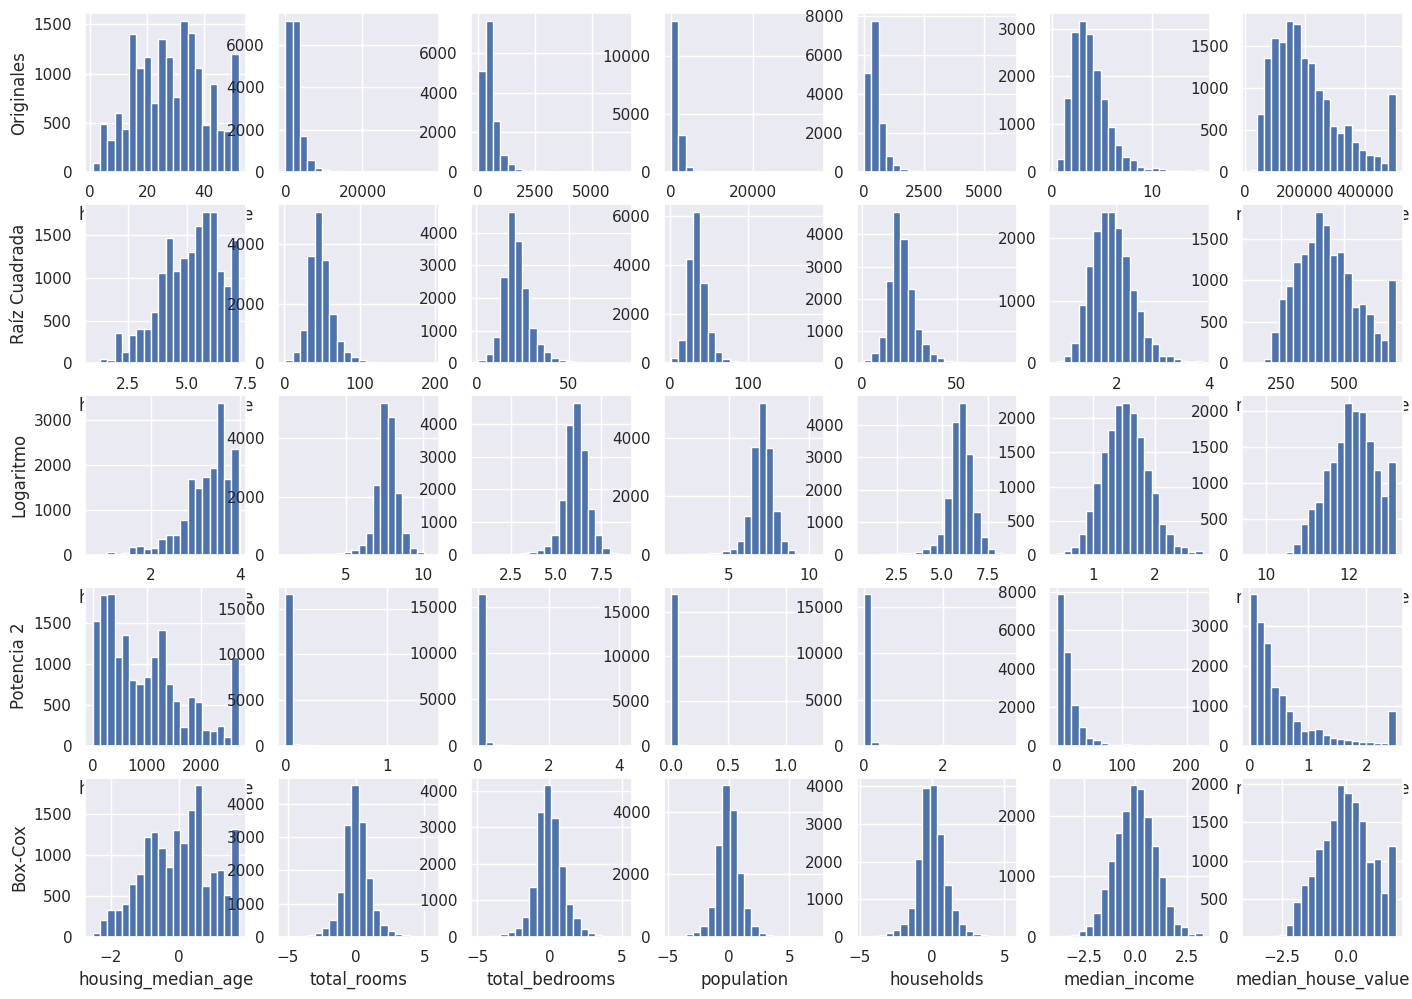

In [4]:
# Lista de los nombres de las 7 variables que trabajaremos en este ejercicio.
variables_a_transformar = ['housing_median_age','total_rooms','total_bedrooms','population','households','median_income','median_house_value']


sns.set(rc={'figure.figsize':(17,12)})
fig, axes = plt.subplots(5, 7)

for k in range(0,7):

    ################################################################################################################
    # INICIA LA SECCIÓN PARA AGREGAR CÓDIGO.
    # Ejercicio 2
    # Solamente deberás escribir tu código en las partes que dicen "None", sustituyendo este por tu código.
    # Deberás utilizar el dataframe "misdatos" con la lista que llamamos "variables_a_transformar" para
    # seleccionar los valores de cada una de las 7 variables que se irán transformando y graficando.


    # Datos originales ---------------------------------------------------------
    plt.subplot(5,7,k+1)

    Transf0 = misdatos[variables_a_transformar[k]] #  En esta línea se debe asignar a Transf0 los valores de cada variable "k" sin transformar.

    plt.hist(Transf0, bins=20)  #  En este línea agrega el comando para obtener el histograma de Transf0 con 20 barras (bins).



    plt.xlabel(variables_a_transformar[k])
    if k==0:
      plt.ylabel('Originales')



    # Datos transformados con raíz cuadrada ------------------------------------
    plt.subplot(5,7,k+8)

    Transf1 = np.sqrt(Transf0)  #  En esta línea se debe aplicar la raíz cuadrada a los valores de cada variable "k" sin transformar.

    plt.hist(Transf1, bins=20)  #  En este línea agrega el comando para obtener el histograma de Transf1 con 20 barras (bins).



    plt.xlabel(variables_a_transformar[k])
    if k==0:
      plt.ylabel('Raíz Cuadrada')



    # Datos transformados con logaritmo natural --------------------------------
    plt.subplot(5,7,k+15)

    Transf2 = np.log(Transf0 + 1) #  En esta línea se debe aplicar el logaritmo natural a los valores de cada variable "k" sin transformar.

    plt.hist(Transf2, bins=20)    #  En este línea agrega el comando para obtener el histograma de Transf2 con 20 barras (bins).


    plt.xlabel(variables_a_transformar[k])
    if k==0:
      plt.ylabel('Logaritmo')



    # Datos transformados con la potencia de 2 ---------------------------------
    plt.subplot(5,7,k+22)

    Transf3 = np.power(Transf0, 2)  #  En esta línea debes elevar al cuadrado los valores de cada variable "k" sin transformar.

    plt.hist(Transf3, bins=20)      #  En este línea agrega el comando para obtener el histograma de Transf3 con 20 barras (bins).



    plt.xlabel(variables_a_transformar[k])
    if k==0:
      plt.ylabel('Potencia 2')


    # Datos transformados con Box-Cox ------------------------------------------
    plt.subplot(5,7,k+29)

    Transf4 = power_transform(np.array(Transf0).reshape(-1,1),method='box-cox')   #  En esta línea se debe aplicar la transformación Box-Cox a los valores de cada variable "k" sin transformar.

    plt.hist(Transf4, bins=20)  #  En este línea agrega el comando para obtener el histograma de Transf4 con 20 barras (bins).



    plt.xlabel(variables_a_transformar[k])
    if k==0:
      plt.ylabel('Box-Cox')

    # TERMINA LA SECCIÓN PARA AGREGAR CÓDIGO.
    ################################################################################################################



plt.show()

#**Ejercicio - 3 - Métricas de desempeño: $RMSE$, $MAE$ y $MAPE$**



**INSTRUCCIONES:**

En el archivo "MNA_IAyAA_semana_2_RLM_teoria_básica_2024.pdf" que se encuentra en Canvas se muestran las fórmulas que definen a las métricas $RMSE$, $MAE$ y $MAPE$.

Investiga el significado de cada una de ellas.

Cada una de ellas se puede calcular mediante los valores observados reales $y$, los valores de predicción $\hat{y}$ y el total de registros $n$.

En este ejercicio deberás definir cada una de estas métricas mediante tres funciones que llamarás mi_RMSE, mi_MAE y mi_MAPE.

Cada una de las tres funciones que definas deberán tener dos argumentos, a saber, los valores observados reales $y$ y los valores de predicción $\hat{y}$.

Como valor de retorno deberá ser el valor numérico real dado por la fórmula que lo define.

Solamente podrás usar las funciones de NumPy del promedio (mean), cuadrado (square) y valor absoluto (abs), además de las operaciones aritméticas básicas.

Para la definición de cada una de ellas se esperarían cuando mucho 5 líneas de código en total, pero pueden ser menos. Una cantidad mayor a esta será penalizada.


In [5]:
#########################################################################
# INICIA LA SECCIÓN PARA AGREGAR CÓDIGO.
# Ejercicio 3

# Incluye aquí las líneas de código que definan a la función mi_RMSE:
def mi_RMSE(v_verdadero,v_prediccion):
  return (np.mean(np.square(v_verdadero - v_prediccion)))**(1/2)
# Calcula el Error Cuadrático Medio (RMSE) entre los valores observados y predichos



# Incluye aquí las líneas de código que definan a la función mi_MAE:
def mi_MAE(v_verdadero,v_prediccion):
  return np.mean(np.abs(v_verdadero-v_prediccion))
# Calcula el Error Absoluto Medio (MAE) entre los valores observados y predichos



# Incluye aquí las líneas de código que definan a la función mi_MAPE:
def mi_MAPE(v_verdadero,v_prediccion):
  return (np.mean(np.abs((v_verdadero-v_prediccion)/v_verdadero)))*100
# Calcula el Error Porcentual Absoluto Medio (MAPE) entre los valores observados y predichos


# TERMINA LA SECCIÓN PARA AGREGAR CÓDIGO.
#########################################################################



In [6]:
Xtrain = misdatos.drop('median_house_value', axis='columns')
ytrain = misdatos['median_house_value']

num_prepro_pipeline = Pipeline(steps = [('imputar', SimpleImputer(strategy='median')),
                                        ('scalar', MinMaxScaler(feature_range=(1, 2))),
                                        ('sqrt', FunctionTransformer(np.sqrt))
                                        ])

numerical_features = ['total_rooms','total_bedrooms','population','households','median_income']

columnasTransformer = ColumnTransformer(transformers = [('numerical', num_prepro_pipeline, numerical_features)],
                                        remainder='passthrough')



modelo_LR = LinearRegression()

scores_RMSEVal = []
scores_MAEVal = []
scores_MAPEVal = []

kf = KFold(n_splits= 10, shuffle=True)

for train_index, val_index in kf.split(Xtrain):

  X_train, X_val = Xtrain.loc[train_index], Xtrain.loc[val_index]
  y_train, y_val = ytrain[train_index], ytrain[val_index]

  XtrainFit = columnasTransformer.fit(X_train)
  XtrainTransf = XtrainFit.transform(X_train)

  modelo_LR = modelo_LR.fit(XtrainTransf, y_train)


  XvalTransf = XtrainFit.transform(X_val)
  yhatVal = modelo_LR.predict(XvalTransf)

  scores_RMSEVal.append(mi_RMSE(y_val, yhatVal))
  scores_MAEVal.append(mi_MAE(y_val, yhatVal))
  scores_MAPEVal.append(mi_MAPE(y_val, yhatVal))


# Desplegar información:
results = [scores_RMSEVal, scores_MAEVal, scores_MAPEVal]
names = ['RMSEval','MAEval','MAPEval']

print("\t  %s\t\t%s   \t\t%s" % (names[0],names[1],names[2]))
for i,z in enumerate(zip(scores_RMSEVal, scores_MAEVal, scores_MAPEVal)):
  print("fold[%d]:  %.1f \t\t%.1f  \t\t%.1f%%" % (i+1,z[0],z[1],z[2]))
print("mean(std) %.1f(%.1f)  \t%.1f(%.1f)   \t%.1f%% (%.1f)" % (np.mean(scores_RMSEVal), np.std(scores_RMSEVal),
                                                                np.mean(scores_MAEVal), np.std(scores_MAEVal),
                                                                np.mean(scores_MAPEVal), np.std(scores_MAPEVal)))

	  RMSEval		MAEval   		MAPEval
fold[1]:  67653.9 		50184.2  		30.5%
fold[2]:  68819.4 		50129.3  		30.0%
fold[3]:  69648.8 		50602.8  		31.2%
fold[4]:  66925.6 		50516.8  		30.2%
fold[5]:  71069.4 		51831.7  		32.3%
fold[6]:  69000.7 		51255.5  		29.9%
fold[7]:  68818.5 		49630.1  		28.5%
fold[8]:  72536.6 		52605.3  		30.7%
fold[9]:  68903.2 		50708.2  		30.0%
fold[10]:  66648.4 		49348.3  		29.0%
mean(std) 69002.4(1700.9)  	50681.2(939.3)   	30.2% (1.0)


**\<\<Fin de la Actividad_1_Semana_2>>**